In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 판다스에서 기술통계 수치 확인하기
- 데이터프레임명.describe()

In [6]:
df = pd.read_csv('data.csv')
df

,class,name,kor,eng,mat,bio
0,1,adam,67,87,90,98
1,1,andrew,45,45,56,98
2,1,ben,95,59,96,88
3,1,clark,65,94,89,98
4,1,dan,45,65,78,98
5,1,noel,78,76,98,89
6,2,paul,87,67,65,56
7,2,walter,89,98,78,78
8,2,oscar,100,78,56,65
9,2,martin,99,89,87,87


In [8]:
df.describe()

,class,kor,eng,mat,bio
count,12.000000,12.0000,12.000000,12.000000,12.000000
mean,1.500000,77.7500,74.333333,78.000000,82.250000
std,0.522233,20.1184,18.217541,15.874508,16.276726
min,1.000000,45.0000,45.000000,56.000000,54.000000
25%,1.000000,65.0000,63.500000,62.750000,74.750000
50%,1.500000,82.5000,77.000000,82.500000,87.500000
75%,2.000000,95.7500,89.000000,89.250000,98.000000
max,2.000000,100.0000,98.000000,98.000000,98.000000


In [10]:
# 국어, 수학의 평균, 표준편차만 출력
df[['kor','mat']].describe()

,kor,mat
count,12.0000,12.000000
mean,77.7500,78.000000
std,20.1184,15.874508
min,45.0000,56.000000
25%,65.0000,62.750000
50%,82.5000,82.500000
75%,95.7500,89.250000
max,100.0000,98.000000


In [11]:
df.loc[:,['kor','mat']].describe()

,kor,mat
count,12.0000,12.000000
mean,77.7500,78.000000
std,20.1184,15.874508
min,45.0000,56.000000
25%,65.0000,62.750000
50%,82.5000,82.500000
75%,95.7500,89.250000
max,100.0000,98.000000


In [15]:
# 평균, 표준편차만 출력1
df.describe().loc['mean':'std']

,class,kor,eng,mat,bio
mean,1.500000,77.7500,74.333333,78.000000,82.250000
std,0.522233,20.1184,18.217541,15.874508,16.276726


In [17]:
# 평균, 표준편차만 출력2
df.describe().iloc[1:3]

,class,kor,eng,mat,bio
mean,1.500000,77.7500,74.333333,78.000000,82.250000
std,0.522233,20.1184,18.217541,15.874508,16.276726


In [28]:
# 국어, 수학의 평균, 표준편차 만 출력
# df.describe().loc[['mean','std'],['kor','mat']]
df.describe().loc['mean':'std', ['kor', 'mat']]

,kor,mat
mean,77.7500,78.000000
std,20.1184,15.874508


### 퀴즈 

25%, 50%, 75% 데이타만 출력하기 (1열 class 제외) 

In [36]:
# loc 활용
df.describe().loc['25%':'75%','kor':'bio']

,kor,eng,mat,bio
25%,65.00,63.5,62.75,74.75
50%,82.50,77.0,82.50,87.50
75%,95.75,89.0,89.25,98.00


In [37]:
# iloc 활용
df.describe().iloc[4:7,1:]

,kor,eng,mat,bio
25%,65.00,63.5,62.75,74.75
50%,82.50,77.0,82.50,87.50
75%,95.75,89.0,89.25,98.00


In [43]:
# 불연속적 행렬 선택
# 순서의 재구성도 가능
df.describe().loc[['25%', '50%', '75%'],['kor', 'eng', 'mat', 'bio']]

,kor,eng,mat,bio
25%,65.00,63.5,62.75,74.75
50%,82.50,77.0,82.50,87.50
75%,95.75,89.0,89.25,98.00


In [39]:
# kor 열만 - Seires 반환
df.describe().iloc[4:7,1]

25%    65.00
50%    82.50
75%    95.75
Name: kor, dtype: float64

### 데이터프레임에서 상관계수

- 데이터프레임.corr()

In [48]:
print(dir(pd))

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p17', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bda

In [49]:
pd.read_csv?

In [52]:
df = pd.read_csv('data.csv')
df

,class,name,kor,eng,mat,bio
0,1,adam,67,87,90,98
1,1,andrew,45,45,56,98
2,1,ben,95,59,96,88
3,1,clark,65,94,89,98
4,1,dan,45,65,78,98
5,1,noel,78,76,98,89
6,2,paul,87,67,65,56
7,2,walter,89,98,78,78
8,2,oscar,100,78,56,65
9,2,martin,99,89,87,87


In [53]:
df.corr()

,class,kor,eng,mat,bio
class,1.000000,0.618665,0.191110,-0.427669,-0.807464
kor,0.618665,1.000000,0.105666,-0.060346,-0.664130
eng,0.191110,0.105666,1.000000,0.532828,0.210930
mat,-0.427669,-0.060346,0.532828,1.000000,0.563289
bio,-0.807464,-0.664130,0.210930,0.563289,1.000000


In [58]:
# df.iloc[1:,1:].corr()
df.loc[:,'kor':'bio'].corr()

,kor,eng,mat,bio
kor,1.000000,0.105666,-0.060346,-0.664130
eng,0.105666,1.000000,0.532828,0.210930
mat,-0.060346,0.532828,1.000000,0.563289
bio,-0.664130,0.210930,0.563289,1.000000


In [66]:
dfCorr = df.loc[:,'kor':'bio'].corr()

### seaborn의 히트맵

- sns.heatmap(data, annot=True, cmap=색상팔레트)
- cmap 팔레트 색상은 인터넷 참조하면 많다.
https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html


In [68]:
sns.heatmap?

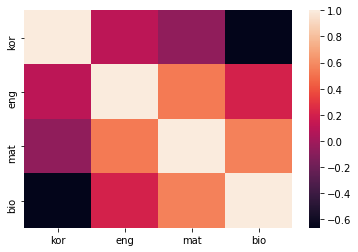

In [73]:
sns.heatmap(dfCorr);

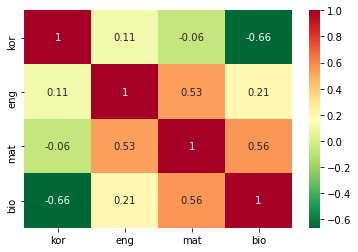

In [85]:
sns.heatmap(dfCorr, annot=True, cmap='RdYlGn_r');

## seaborn 에서 제공하는 데이터셋 활용

데이터프레임명 = sns.load_dataset(데이터셋명)
```
iris # 붓꽃 데이터
titanic # 타이타닉
tips # 레스토랑 팁
flights # 여객기 이용 승객
```

In [90]:
flights = sns.load_dataset('flights')
flights.shape

(144, 3)

In [97]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [89]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [112]:
flights.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [117]:
flights.corr().loc['year', 'passengers'], flights.corr().iloc[0, 1]

(0.9218238352924211, 0.9218238352924211)

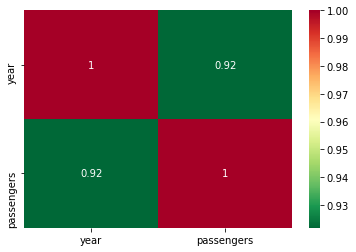

In [120]:
sns.heatmap(flights.corr(), annot=True, cmap='RdYlGn_r');

# 피봇테이블을 이용해서 데이터프레임 구조 변경하기
- 데이터프레임.pivot(행, 열, 값)

In [122]:
flights2 = flights.pivot('month', 'year', 'passengers')
flights2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


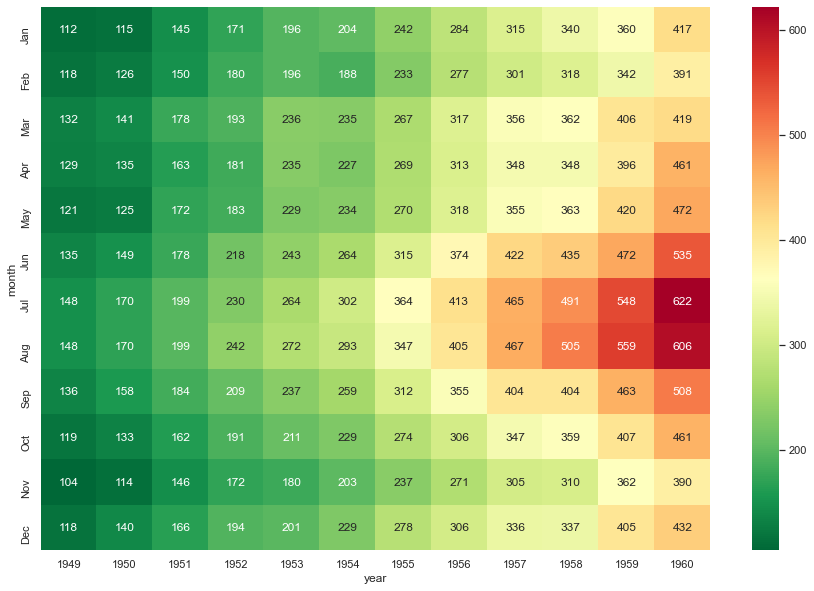

In [151]:
sns.heatmap(flights2, annot=True, cmap='RdYlGn_r', fmt='d');

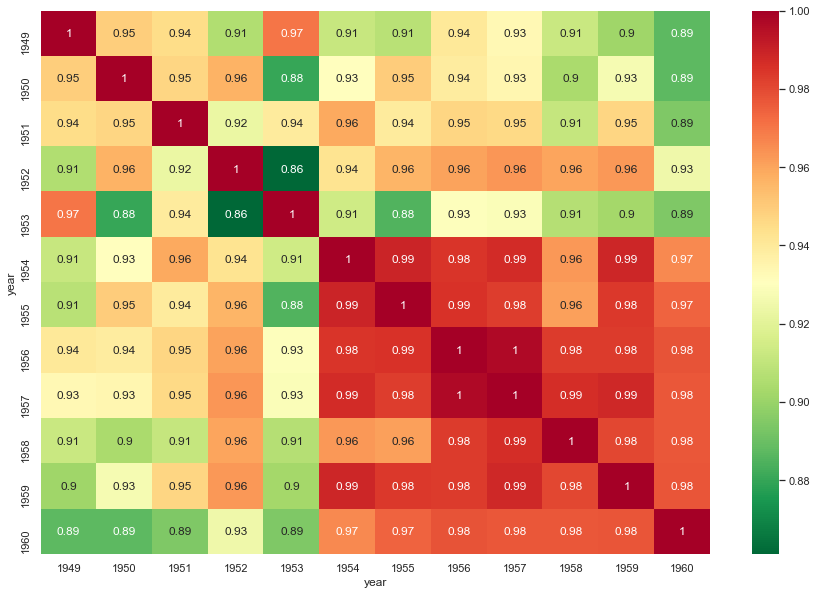

In [150]:
sns.heatmap(flights2.corr(), annot=True, cmap='RdYlGn_r');

### heatmap 옵션 변경

- fig 크기 변경
```
sns.set(rc = {'figure.figsize':(15,10)})
plt.figure(figsize = (15,8))
```
- annot 숫자 크기 변경
```
annot_kws={'size':20}
```
- 윤곽선 추가
```
linewidth=0.5
```

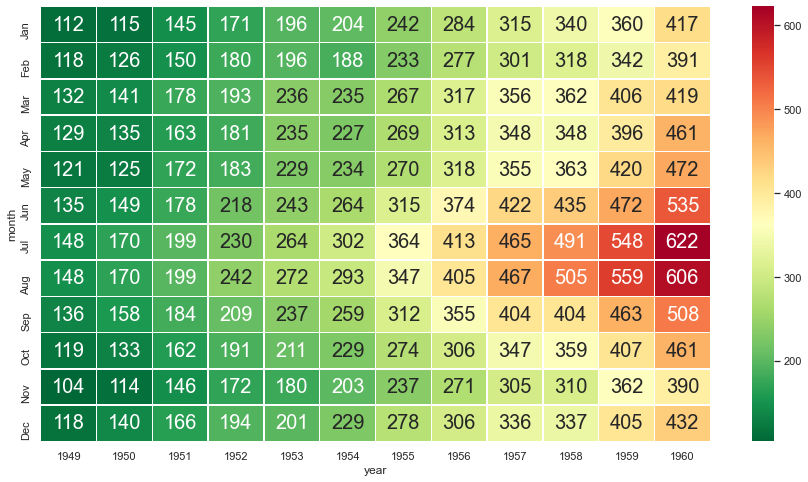

In [152]:
# sns.set(rc = {'figure.figsize':(15,10)})
plt.figure(figsize = (15,8))
sns.heatmap(flights2, annot=True, annot_kws={'size':20}, 
            cmap='RdYlGn_r', fmt='d', linewidth=0.5);